# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
units = "&units=metric"
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
country = []
cloudiness = []
date = []
latitude = []
longitude = []
humidity = []
max_temperature = []
wind_speed = []
citay = []
i=0
for city in cities:
    query_url = base_url + city + "&APPID=" + api_key + units
    i+=1
    #print the query_url
    try:
        response = requests.get(query_url).json()
        print(f"Processing Record {i} | {city}")
        try:
            country.append(response['clouds']['all'])
            cloudiness.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])
            latitude.append(response['coord']['lat'])
            longitude.append(response['coord']['lon'])
            max_temperature.append(response['main']['temp_max'])
            wind_speed.append(response['wind']["speed"])
            citay.append(city)
        except KeyError:
            print("value not found...moving on")
    except NameError:
        print("city not found... moving on")

Processing Record 1 | mataura
Processing Record 2 | grants
Processing Record 3 | takikawa
Processing Record 4 | hilo
Processing Record 5 | albany
Processing Record 6 | tuatapere
Processing Record 7 | cape town
Processing Record 8 | beyneu
Processing Record 9 | avarua
Processing Record 10 | port alfred
Processing Record 11 | tabuk
Processing Record 12 | nikolskoye
Processing Record 13 | tasiilaq
Processing Record 14 | aksarka
Processing Record 15 | hopatcong
Processing Record 16 | sola
Processing Record 17 | tiksi
Processing Record 18 | yantal
Processing Record 19 | taolanaro
value not found...moving on
Processing Record 20 | puerto ayora
Processing Record 21 | punta arenas
Processing Record 22 | geraldton
Processing Record 23 | lasa
Processing Record 24 | butaritari
Processing Record 25 | port elizabeth
Processing Record 26 | eyl
Processing Record 27 | cabo san lucas
Processing Record 28 | meulaboh
Processing Record 29 | thompson
Processing Record 30 | oktyabrskoye
Processing Record 31

Processing Record 235 | mount darwin
Processing Record 236 | agen
Processing Record 237 | vestmanna
Processing Record 238 | marzuq
Processing Record 239 | orlik
Processing Record 240 | provideniya
Processing Record 241 | kalmar
Processing Record 242 | eureka
Processing Record 243 | lhuntshi
value not found...moving on
Processing Record 244 | praia da vitoria
Processing Record 245 | chikoy
value not found...moving on
Processing Record 246 | algiers
Processing Record 247 | byron bay
Processing Record 248 | san patricio
Processing Record 249 | ayagoz
Processing Record 250 | natal
Processing Record 251 | pandamatenga
Processing Record 252 | iqaluit
Processing Record 253 | afsin
Processing Record 254 | tsabong
Processing Record 255 | khasan
Processing Record 256 | ouango
Processing Record 257 | norman wells
Processing Record 258 | dongsheng
Processing Record 259 | yithion
value not found...moving on
Processing Record 260 | atka
value not found...moving on
Processing Record 261 | timmins
Pro

Processing Record 459 | rawson
Processing Record 460 | hamilton
Processing Record 461 | felanitx
Processing Record 462 | saint-georges
Processing Record 463 | hokitika
Processing Record 464 | santa rosa
Processing Record 465 | saint-lo
Processing Record 466 | shymkent
Processing Record 467 | bubaque
Processing Record 468 | quimper
Processing Record 469 | isla vista
Processing Record 470 | guanica
Processing Record 471 | standerton
Processing Record 472 | yerbogachen
Processing Record 473 | dudinka
Processing Record 474 | faya
Processing Record 475 | hermon
Processing Record 476 | magistralnyy
Processing Record 477 | cascais
Processing Record 478 | mitsamiouli
Processing Record 479 | itaituba
Processing Record 480 | palabuhanratu
value not found...moving on
Processing Record 481 | valeni
Processing Record 482 | natitingou
Processing Record 483 | abashiri
Processing Record 484 | esil
Processing Record 485 | nouadhibou
Processing Record 486 | blora
Processing Record 487 | susanville
Proce

ConnectionError: ('Connection aborted.', ConnectionAbortedError(10053, 'An established connection was aborted by the software in your host machine', None, 10053, None))

In [4]:
len(citay)

497

In [5]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city":city,
    "cloudiness (%)": cloudiness,
    "country":country,
    "date":date,
    "humidity (%)":humidity,
    "latitude":latitude,
    "longitude":longitude,
    "max_temperature (C)":max_temperature,
    "wind_speed (m/s)":wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,cloudiness (%),country,date,humidity (%),latitude,longitude,max_temperature (C),wind_speed (m/s)
0,sunrise manor,NZ,0,1552359609,79,-46.19,168.86,20.00,2.24
1,sunrise manor,US,90,1552358100,87,35.15,-107.85,8.00,7.70
2,sunrise manor,JP,75,1552356000,86,43.62,141.95,-1.00,2.10
3,sunrise manor,US,90,1552360157,64,19.71,-155.08,23.00,3.60
4,sunrise manor,US,90,1552359915,86,42.65,-73.75,2.22,6.70


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data.to_csv(header=True, index=True)

',city,cloudiness (%),country,date,humidity (%),latitude,longitude,max_temperature (C),wind_speed (m/s)\n0,sunrise manor,NZ,0,1552359609,79,-46.19,168.86,20.0,2.24\n1,sunrise manor,US,90,1552358100,87,35.15,-107.85,8.0,7.7\n2,sunrise manor,JP,75,1552356000,86,43.62,141.95,-1.0,2.1\n3,sunrise manor,US,90,1552360157,64,19.71,-155.08,23.0,3.6\n4,sunrise manor,US,90,1552359915,86,42.65,-73.75,2.22,6.7\n5,sunrise manor,NZ,56,1552360207,79,-46.13,167.69,20.0,2.24\n6,sunrise manor,ZA,75,1552359964,93,-33.93,18.42,17.22,2.6\n7,sunrise manor,KZ,24,1552360255,79,45.32,55.19,0.56,0.71\n8,sunrise manor,CK,92,1552357800,94,-21.21,-159.78,23.0,2.6\n9,sunrise manor,ZA,92,1552359906,98,-33.59,26.89,19.44,0.45\n10,sunrise manor,PH,0,1552360255,43,17.41,121.44,27.81,1.11\n11,sunrise manor,RU,90,1552360092,92,59.7,30.79,-5.0,3.0\n12,sunrise manor,GL,88,1552355400,67,65.61,-37.64,-6.0,2.6\n13,sunrise manor,RU,48,1552360000,75,66.56,67.8,-13.55,2.91\n14,sunrise manor,US,75,1552359997,29,40.93,-74.66,9.0,7.

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

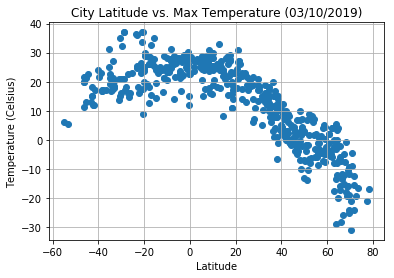

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["max_temperature (C)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (03/10/2019)")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevs.MaxTemperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

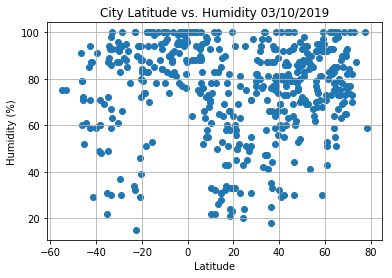

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["humidity (%)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity 03/10/2019")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevs.Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

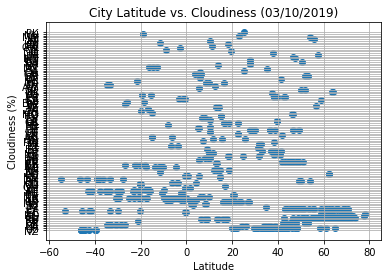

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["cloudiness (%)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (03/10/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevs.Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

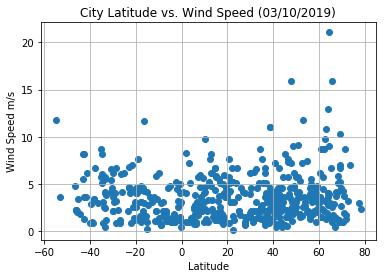

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["wind_speed (m/s)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (03/10/2019)")
plt.ylabel("Wind Speed m/s")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevs.WindSpeed.png")

# Show plot
plt.show()